<a href="https://colab.research.google.com/github/SagnikChunder/Stock-Price-Prediction-using-ML/blob/main/stock_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime, timedelta

# Define stock symbol
stock = 'GOOG'

# Define date range (safe and reliable)
end = datetime.now()
start = end - timedelta(days=365)

# Download stock data
data = yf.download(stock, start=start, end=end)
# Display the first few rows
if not data.empty:
    print(data.head())
else:
    print("[❌] Failed to fetch data. Please check your internet or ticker symbol.")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2024-05-16  174.603012  175.508726  173.229528  173.776938  17247300
2024-05-17  176.454208  176.658244  174.155101  174.722421  16546400
2024-05-20  177.618713  179.101680  176.389535  176.474126  17495100
2024-05-21  178.693619  178.972313  176.474136  177.558993  14706000
2024-05-22  177.160889  178.008877  175.946639  177.558997  16189400


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2024-05-16,174.603012,175.508726,173.229528,173.776938,17247300
1,2024-05-17,176.454208,176.658244,174.155101,174.722421,16546400
2,2024-05-20,177.618713,179.101680,176.389535,176.474126,17495100
3,2024-05-21,178.693619,178.972313,176.474136,177.558993,14706000
4,2024-05-22,177.160889,178.008877,175.946639,177.558997,16189400
...,...,...,...,...,...,...
245,2025-05-09,154.380005,156.429993,153.830002,155.550003,22871000
246,2025-05-12,159.580002,160.440002,157.889999,159.100006,31884900
247,2025-05-13,160.889999,162.059998,157.580002,159.919998,24944300


In [5]:
ma_100_days=data.Close.rolling(100).mean()

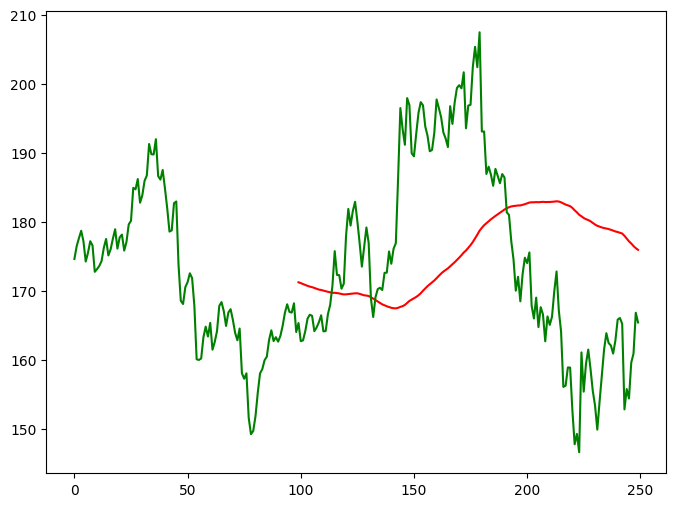

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days=data.Close.rolling(200).mean()

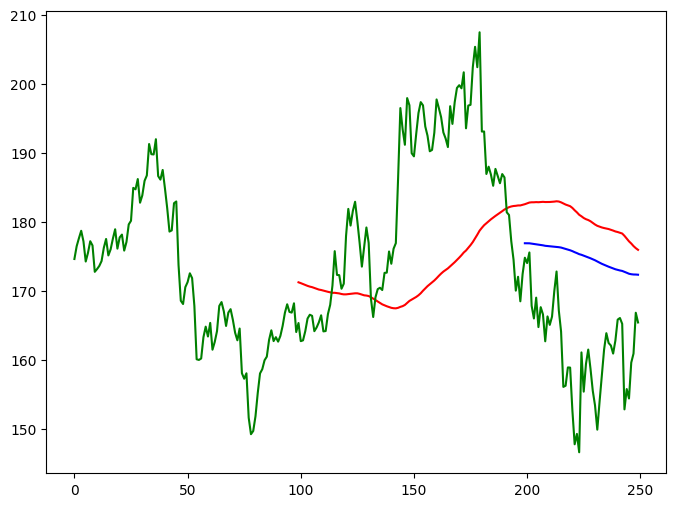

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

200

In [12]:
data_test.shape[0]

50

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - loss: 0.3842
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 0.2917
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - loss: 0.1261
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.0580
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.0460
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0474
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - loss: 0.0370
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.0356
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0379
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.0419
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - loss: 0.0512
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0388
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - loss: 0.0372
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - loss: 0.0392
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 0.0409
Epoch 16/50
4/4 ━━━

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

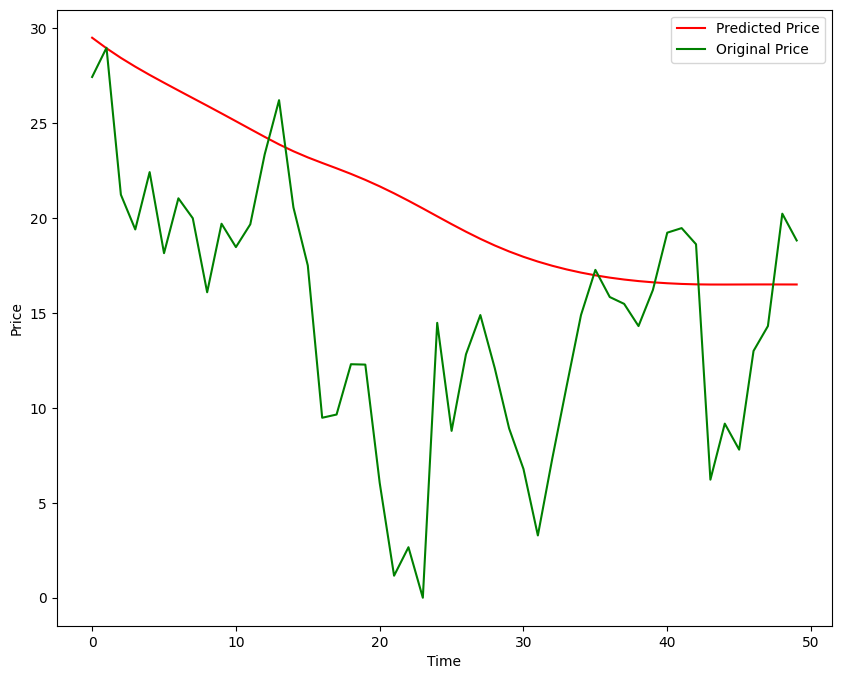

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')